#Genetic Programming (GP):3

#1. Tree-based Genetic Programming:
Programs are represented as trees, and genetic operators are applied to tree structures (e.g., subtree crossover, subtree mutation).

In [6]:
import random
import operator

# Define the set of functions and terminals
# For demonstration purposes, let's consider basic arithmetic operations (+, -, *, /) and terminal values (constants)
functions = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.truediv  # Use truediv for floating-point division
}

# Terminal values (constants) - for simplicity, let's use integers
terminals = [1, 2, 3, 4, 5]


class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def evaluate(self):
        if self.value in functions:
            # Evaluate the function recursively on child nodes
            args = [child.evaluate() for child in self.children]
            return functions[self.value](*args)
        else:
            # Terminal node (constant)
            return self.value


def create_random_tree(max_depth):
    if max_depth == 1 or random.random() < 0.3:  # Terminal node
        value = random.choice(terminals)
        return Node(value)
    else:  # Function node
        value = random.choice(list(functions.keys()))
        node = Node(value)
        arity = len(functions[value])  # Arity of the selected function
        for _ in range(arity):
            node.children.append(create_random_tree(max_depth - 1))
        return node


def subtree_crossover(tree1, tree2):
    # Select a random node from each tree
    random_node1 = get_random_node(tree1)
    random_node2 = get_random_node(tree2)

    # Swap subtrees
    random_node1.value, random_node2.value = random_node2.value, random_node1.value
    random_node1.children, random_node2.children = random_node2.children, random_node1.children


def subtree_mutation(tree, max_depth):
    random_node = get_random_node(tree)
    if random_node.children:
        # Replace the subtree with a new randomly generated subtree
        random_node.children = [create_random_tree(max_depth - 1) for _ in range(len(random_node.children))]
    else:
        # Node is a terminal, replace with a new terminal value
        random_node.value = random.choice(terminals)


def get_random_node(tree):
    # Traverse the tree to select a random node
    nodes = [tree]
    while nodes:
        node = random.choice(nodes)
        if node.children:
            nodes.extend(node.children)
        else:
            return node


# Example usage
tree1 = create_random_tree(max_depth=3)
tree2 = create_random_tree(max_depth=2)

print("Original Tree 1:")
print(tree1.evaluate())

print("\nOriginal Tree 2:")
print(tree2.evaluate())

# Perform subtree crossover
subtree_crossover(tree1, tree2)

print("\nAfter Crossover - Tree 1:")
print(tree1.evaluate())

print("\nAfter Crossover - Tree 2:")
print(tree2.evaluate())

# Perform subtree mutation
subtree_mutation(tree1, max_depth=3)

print("\nAfter Mutation - Tree 1:")
print(tree1.evaluate())

Original Tree 1:
5

Original Tree 2:
4

After Crossover - Tree 1:
4

After Crossover - Tree 2:
5

After Mutation - Tree 1:
2


#2. Linear Genetic Programming (LGP)

Linear Genetic Programming (LGP) represents programs as linear sequences of instructions, typically using fixed-length arrays of instructions or a list of operations and operands. The evolution of programs in LGP involves applying genetic operations such as crossover and mutation directly on these linear sequences.

In [7]:
import random
import operator

# Define the set of functions and terminals
functions = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.truediv
}

# Terminal values (constants) - for simplicity, let's use integers
terminals = [1, 2, 3, 4, 5]

# Define the maximum length of the program (number of instructions)
max_length = 10


def create_random_program():
    program_length = random.randint(1, max_length)
    program = []
    for _ in range(program_length):
        if random.random() < 0.5:  # Use a function/operator
            function = random.choice(list(functions.keys()))
            program.append(function)
        else:  # Use a terminal value
            terminal = random.choice(terminals)
            program.append(terminal)
    return program


def evaluate_program(program):
    stack = []
    for instruction in program:
        if isinstance(instruction, int):  # Push terminal value onto stack
            stack.append(instruction)
        elif instruction in functions:  # Apply function/operator
            if len(stack) < 2:
                continue  # Invalid operation, skip
            operand2 = stack.pop()
            operand1 = stack.pop()
            result = functions[instruction](operand1, operand2)
            stack.append(result)
    if stack:
        return stack[-1]
    else:
        return None


def crossover(parent1, parent2):
    # Perform one-point crossover
    if len(parent1) < 2 or len(parent2) < 2:
        return parent1, parent2

    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutate(program, mutation_rate):
    mutated_program = program[:]
    for i in range(len(mutated_program)):
        if random.random() < mutation_rate:
            if isinstance(mutated_program[i], int):  # Mutate terminal to a different value
                mutated_program[i] = random.choice(terminals)
            else:  # Mutate function/operator to a different one
                mutated_program[i] = random.choice(list(functions.keys()))
    return mutated_program


# Example usage
parent1 = create_random_program()
parent2 = create_random_program()

print("Parent 1:", parent1)
print("Parent 2:", parent2)

# Perform crossover
child1, child2 = crossover(parent1, parent2)
print("\nChild 1 after crossover:", child1)
print("Child 2 after crossover:", child2)

# Perform mutation on child 1
mutation_rate = 0.2
mutated_child1 = mutate(child1, mutation_rate)
print("\nMutated Child 1:", mutated_child1)

# Evaluate programs
print("\nEvaluation of Parent 1:", evaluate_program(parent1))
print("Evaluation of Parent 2:", evaluate_program(parent2))
print("Evaluation of Child 1 after mutation:", evaluate_program(mutated_child1))

Parent 1: [1, 5, '/', 1]
Parent 2: [3, '-', 3]

Child 1 after crossover: [1, '-', 3]
Child 2 after crossover: [3, 5, '/', 1]

Mutated Child 1: [1, '-', 3]

Evaluation of Parent 1: 1
Evaluation of Parent 2: 3
Evaluation of Child 1 after mutation: 3


#3. Grammatical Evolution (GE)

Evolution (GE) is a type of Genetic Programming (GP) that incorporates grammatical rules to guide the evolution of solutions, ensuring that the evolved programs adhere to a specified grammar. In GE, programs are represented as sequences of symbols derived from a context-free grammar. The genetic operations such as crossover and mutation are applied to these symbol sequences while maintaining grammatical correctness

In [16]:
import random

# Define the grammar rules
grammar = {
    "<expr>": ["<expr>+<expr>", "<expr>-<expr>", "sin(<expr>)", "cos(<expr>)", "x"],
    "<start>": ["<expr>"]
}

# Function to expand a nonterminal symbol based on the grammar
def expand_symbol(symbol):
    if symbol in grammar:
        choices = grammar[symbol]
        selected_choice = random.choice(choices)
        return selected_choice
    else:
        return symbol

# Function to generate an individual (string) based on the grammar
def generate_individual(start_symbol):
    stack = [start_symbol]
    result = []

    while stack:
        symbol = stack.pop()
        if symbol in grammar:
            choices = grammar[symbol]
            selected_choice = random.choice(choices)
            # Push symbols in reverse order to emulate depth-first expansion
            stack.extend(reversed(selected_choice.split()))
        else:
            result.append(symbol)

    return ''.join(result)

# Fitness function (example: evaluate the individual fitness)
def fitness_function(individual):
    # Example fitness: count the number of 'x' symbols in the individual
    return individual.count('x')

# Genetic algorithm parameters
population_size = 100
num_generations = 50
mutation_rate = 0.1

# Generate initial population
population = [generate_individual("<start>") for _ in range(population_size)]

# Main loop for genetic algorithm
for generation in range(num_generations):
    # Evaluate fitness of each individual
    fitness_scores = [fitness_function(individual) for individual in population]

    # Select individuals for reproduction (tournament selection)
    selected_indices = random.choices(range(population_size), k=population_size, weights=fitness_scores)
    selected_population = [population[i] for i in selected_indices]

    # Create new population through crossover and mutation
    new_population = []
    while len(new_population) < population_size:
        parent1 = random.choice(selected_population)
        parent2 = random.choice(selected_population)

        # Calculate crossover point ensuring it's at least 1
        max_crossover_point = min(len(parent1), len(parent2)) - 1
        if max_crossover_point < 1:
            continue  # Skip this iteration if crossover is not possible

        crossover_point = random.randint(1, max_crossover_point)
        child = parent1[:crossover_point] + parent2[crossover_point:]

        # Mutation (randomly change a character in the child)
        if random.random() < mutation_rate:
            mutate_index = random.randint(0, len(child) - 1)
            child = child[:mutate_index] + random.choice('abcdefghijklmnopqrstuvwxyz+-*()') + child[mutate_index+1:]

        new_population.append(child)


    # Replace old population with new population
    population = new_population

# Select the best individual from the final population
best_individual = max(population, key=fitness_function)
best_fitness = fitness_function(best_individual)

print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)


Best Individual: <oxxrgxxrxsr>
Best Fitness: 5


#4. Gene Expression Programming (GEP):
Uses linear chromosomes to represent programs, which are then expressed as trees during evaluation.


In [18]:
import random
import operator

# Define the set of operations and terminals
OPERATIONS = {'+': operator.add,
              '-': operator.sub,
              '*': operator.mul,
              '/': operator.truediv}

# Constants or variables (for simplicity, we'll use constants)
TERMINALS = [random.uniform(-10, 10) for _ in range(5)]  # Generate random constants


class Gene:
    def __init__(self):
        self.value = random.choice(list(OPERATIONS.keys()) + TERMINALS)


class Chromosome:
    def __init__(self, length):
        self.genes = [Gene() for _ in range(length)]

    def __str__(self):
        return ''.join(str(gene.value) for gene in self.genes)

    def evaluate_tree(self):
        expression = self.__build_tree(0)[0]
        return expression

    def __build_tree(self, index):
        if isinstance(self.genes[index].value, str):  # Operation
            op = self.genes[index].value
            left, left_end = self.__build_tree(index + 1)
            right, right_end = self.__build_tree(left_end + 1)
            return (OPERATIONS[op], left, right), right_end
        else:  # Terminal
            return self.genes[index].value, index


def evaluate_expression(expression, x):
    if isinstance(expression, tuple):  # Operation
        op, left, right = expression
        return op(evaluate_expression(left, x), evaluate_expression(right, x))
    else:  # Terminal (constant or variable)
        return expression


# Example usage:
chromosome_length = 7
chromosome = Chromosome(chromosome_length)
print("Chromosome:", chromosome)

# Evaluate the tree expression
tree_expression = chromosome.evaluate_tree()
print("Tree Expression:", tree_expression)

# Evaluate the tree expression for a specific value of x
x_value = 3
result = evaluate_expression(tree_expression, x_value)
print(f"Result for x={x_value}: {result}")


Chromosome: -0.10983615658467016-8.81376327656091-3.8678925847211376-0.10983615658467016-8.81376327656091/-
Tree Expression: -0.10983615658467016
Result for x=3: -0.10983615658467016


#5. Evolvable Hardware (EHW):
Applies genetic programming techniques to evolve electronic circuits or hardware designs.

In [19]:
%pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg 	min
0  	100   	48.4	30 
1  	66    	38.4	30 
2  	51    	34.4	30 
3  	64    	37.2	30 
4  	58    	37.6	30 
5  	63    	36.4	30 
6  	56    	38  	30 
7  	63    	37.6	30 
8  	60    	36.4	30 
9  	57    	36  	30 
10 	59    	36.4	30 
11 	52    	38.4	30 
12 	64    	36.8	30 
13 	65    	38.4	30 
14 	61    	35.2	30 
15 	63    	38.8	30 
16 	58    	36  	30 
17 	64    	38.8	30 
18 	52    	36.4	30 
19 	61    	34.4	30 
20 	68    	37.2	30 
21 	65    	40  	30 
22 	62    	37.6	30 
23 	58    	36.8	30 
24 	51    	37.2	30 
25 	53    	33.2	30 
26 	64    	38.4	30 
27 	68    	37.6	30 
28 	59    	38.4	30 
29 	59    	36.8	30 
30 	67    	36.8	30 
31 	54    	35.6	30 
32 	60    	39.2	30 
33 	57    	36  	30 
34 	67    	38  	30 
35 	60    	36  	30 
36 	52    	37.2	30 
37 	76    	37.6	30 
38 	73    	37.2	30 
39 	62    	38  	30 
40 	60    	36.4	30 
41 	53    	33.6	30 
42 	71    	37.6	30 
43 	66    	36.8	30 
44 	55    	36  	30 
45 	65    	39.6	30 
46 	58    	38  	30 
47 	58    	34.8	30 
48 	62    	37.6	30 


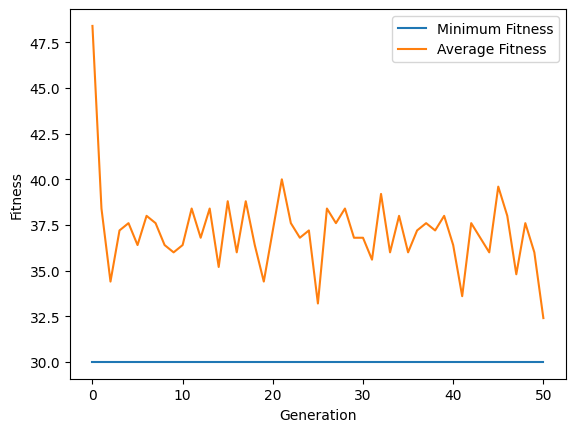

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


# Define the target function: Square wave generator
def square_wave_generator(x, a, b):
    return 1 if (a < x % (a + b) <= a + b / 2) else 0


# Define the evaluation function for the electronic circuit (fitness function)
def evaluate_circuit(individual):
    error = 0
    # Evaluate the circuit over a range of input values
    for x in range(100):
        predicted_output = execute_circuit(individual, x)
        target_output = square_wave_generator(x, 10, 20)  # Target square wave
        error += abs(predicted_output - target_output)
    return error,


# Define a function to execute the circuit based on the genotype
def execute_circuit(individual, x):
    # Individual is an np.ndarray of boolean values (0 or 1)
    # Example: individual = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
    # Implement your circuit logic here based on the genotype
    # For simplicity, we'll use a basic logic to compute the output
    output = sum(individual) % 2  # Example: XOR-like behavior
    return output


# Create a toolbox for genetic programming
toolbox = base.Toolbox()

# Define the individual (circuit) representation
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

# Register individual creation function
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)

# Register population creation functions
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_circuit)

# Define main evolutionary algorithm
def main():
    random.seed(42)

    pop_size = 100
    num_generations = 50

    population = toolbox.population(n=pop_size)
    hall_of_fame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
                                              ngen=num_generations, stats=stats,
                                              halloffame=hall_of_fame, verbose=True)

    # Return the best individual found
    return hall_of_fame[0], logbook


if __name__ == "__main__":
    best_individual, logbook = main()

    # Plotting the evolution statistics
    gen = logbook.select("gen")
    min_fit = logbook.select("min")
    avg_fit = logbook.select("avg")

    plt.plot(gen, min_fit, label="Minimum Fitness")
    plt.plot(gen, avg_fit, label="Average Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()